## Imports e Configs

In [3]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [13]:
import yfinance as yf
import pandas as pd
import numpy as np

from sklearn.metrics import r2_score

## Load dataset

In [111]:
bova11 = yf.Ticker("^BVSP")

bova_hist = bova11.history(period='720d')
bova_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-10-21,104729.000000,106027.000000,104696.000000,106022.000000,3504900,0,0
2019-10-22,107101.000000,107382.000000,107076.000000,107381.000000,5224900,0,0
2019-10-23,107381.000000,107959.000000,107041.000000,107544.000000,4656200,0,0
2019-10-24,107553.000000,107744.000000,106593.000000,106986.000000,5619200,0,0
2019-10-25,106990.000000,108083.000000,106990.000000,107364.000000,5398900,0,0
...,...,...,...,...,...,...,...
2022-09-09,109922.000000,112540.000000,109922.000000,112300.000000,12155200,0,0
2022-09-12,112307.000000,114160.000000,112305.000000,113407.000000,11707100,0,0
2022-09-13,113398.000000,113400.000000,110522.000000,110794.000000,12612500,0,0


In [112]:
df = bova_hist.filter(['Date', 'Close'])
df = df[::-1]
df['ds'] = df.index
df['ds'] = pd.to_datetime(df['ds'])
df.columns = ['y', 'ds']
df.reset_index(drop=True, inplace=True)

df['y'] = np.array(df['y'])

df.head(10)

,y,ds
0,110538.890625,2022-09-15
1,110547.000000,2022-09-14
2,110794.000000,2022-09-13
3,113407.000000,2022-09-12
4,112300.000000,2022-09-09
5,109916.000000,2022-09-08
6,109764.000000,2022-09-06
7,112203.000000,2022-09-05
8,110864.000000,2022-09-02
9,110405.000000,2022-09-01


In [113]:
df.dtypes

y            float64
ds    datetime64[ns]
dtype: object

## Modeling

### ARIMA


In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
data = sm.datasets.sunspots.load_pandas().data['SUNACTIVITY']


In [ ]:
def AR_model_generator(ts, p):
  model = ARIMA(ts, order=[p, 0, 0])
  model_fit = model.fit()
  return model_fit

In [ ]:
AR_1 = AR_model_generator(df.y, 1)
AR_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  720
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -6423.630
Date:                Thu, 15 Sep 2022   AIC                          12853.259
Time:                        02:31:07   BIC                          12866.997
Sample:                             0   HQIC                         12858.563
                                - 720                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.082e+05   6744.654     16.036      0.000    9.49e+04    1.21e+05
ar.L1          0.9879      0.004    248.430      0.000       0.980       0.996
sigma2      3.274e+06   8.03e+04     40.779      0.000    3.12e+06    3.43e+06
===================================================================================
Ljung-Box (L1) (Q):                  17.72   Jarque-Bera (JB):              2587.29
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.20   Skew:                             1.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

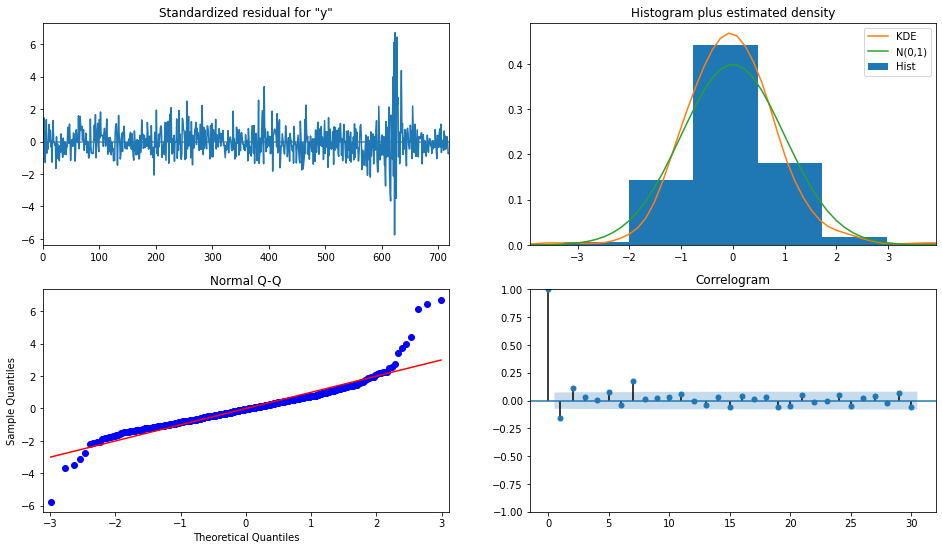

In [ ]:
fig = plt.figure(figsize=(16,9))
fig = AR_1.plot_diagnostics(fig=fig, lags=30)

In [ ]:
AR_2 = AR_model_generator(df.y, 2)
AR_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  720
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -6414.329
Date:                Thu, 15 Sep 2022   AIC                          12836.657
Time:                        01:54:02   BIC                          12854.974
Sample:                             0   HQIC                         12843.728
                                - 720                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.082e+05   7528.160     14.367      0.000    9.34e+04    1.23e+05
ar.L1          0.8299      0.014     59.489      0.000       0.803       0.857
ar.L2          0.1596      0.014     11.262      0.000       0.132       0.187
sigma2      3.195e+06    145.662   2.19e+04      0.000    3.19e+06     3.2e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):              1725.59
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               2.92   Skew:                             1.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.76e+25. Standard errors may be unstable.
"""

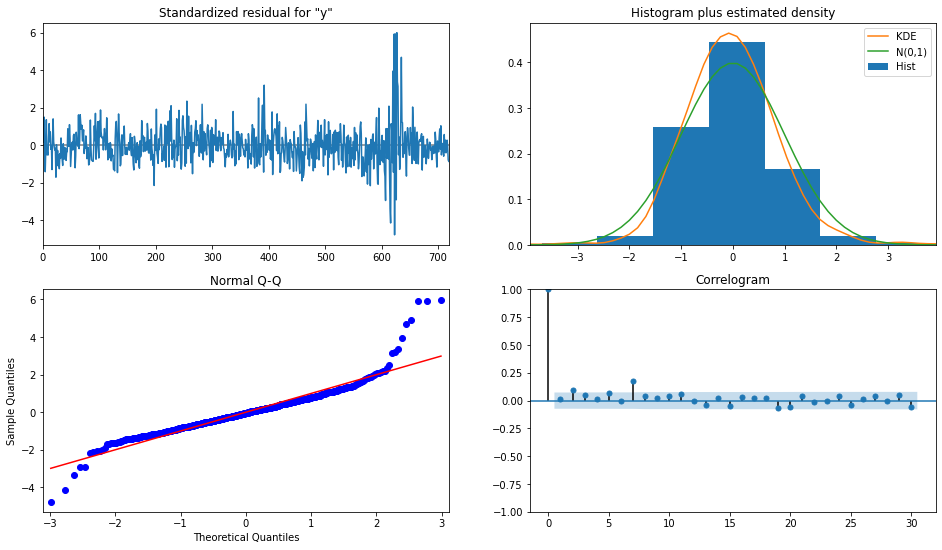

In [ ]:
fig = plt.figure(figsize=(16,9))
fig = AR_2.plot_diagnostics(fig=fig, lags=30)

In [ ]:
def ARMA_model_generation(ts, p, q):
    model = ARIMA(ts, order = [p, 0, q])
    model_fit = model.fit()
    return model_fit

In [ ]:
ARMA_1_1 = ARMA_model_generation(data, 1, 1)
ARMA_1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1352.613
Date:                Thu, 15 Sep 2022   AIC                           2713.226
Time:                        01:58:54   BIC                           2728.160
Sample:                             0   HQIC                          2719.197
                                - 309                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.7921      8.077      6.041      0.000      32.962      64.623
ar.L1          0.7355      0.046     15.921      0.000       0.645       0.826
ma.L1          0.5194      0.048     10.798      0.000       0.425       0.614
sigma2       369.1788     25.783     14.319      0.000     318.646     419.712
===================================================================================
Ljung-Box (L1) (Q):                   9.89   Jarque-Bera (JB):                73.24
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.93   Skew:                             0.89
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

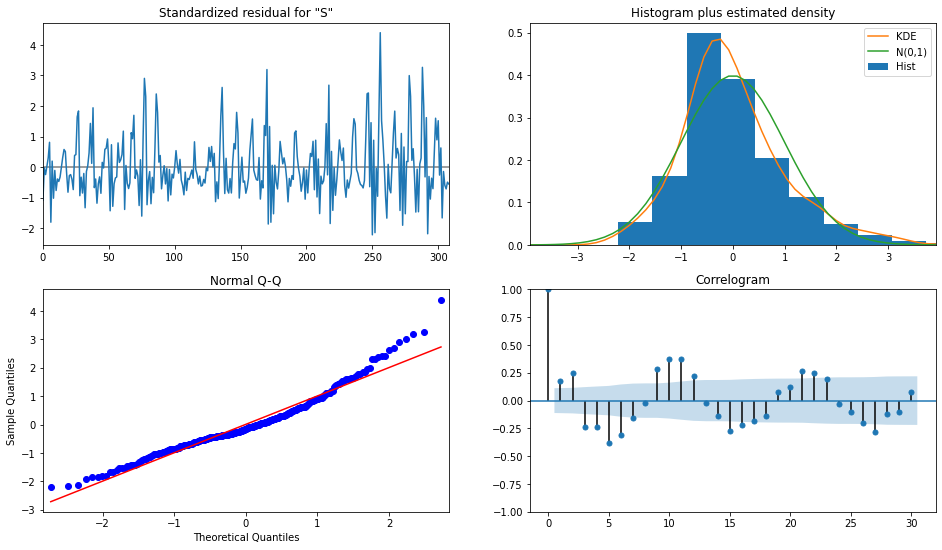

In [ ]:
fig = plt.figure(figsize=(16,9))
fig = ARMA_1_1.plot_diagnostics(fig=fig, lags=30)

In [ ]:
ARMA_2_2 = ARMA_model_generation(data, 2, 2)
ARMA_2_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1304.436
Date:                Thu, 15 Sep 2022   AIC                           2620.873
Time:                        02:44:14   BIC                           2643.273
Sample:                             0   HQIC                          2629.828
                                - 309                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.7502      3.667     13.567      0.000      42.563      56.938
ar.L1          1.4460      0.077     18.755      0.000       1.295       1.597
ar.L2         -0.7458      0.064    -11.681      0.000      -0.871      -0.621
ma.L1         -0.1405      0.097     -1.447      0.148      -0.331       0.050
ma.L2          0.0691      0.079      0.874      0.382      -0.086       0.224
sigma2       269.5971     18.567     14.520      0.000     233.207     305.988
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               102.49
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.53   Skew:                             0.91
Prob(H) (two-sided):                  0.03   Kurtosis:                         5.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

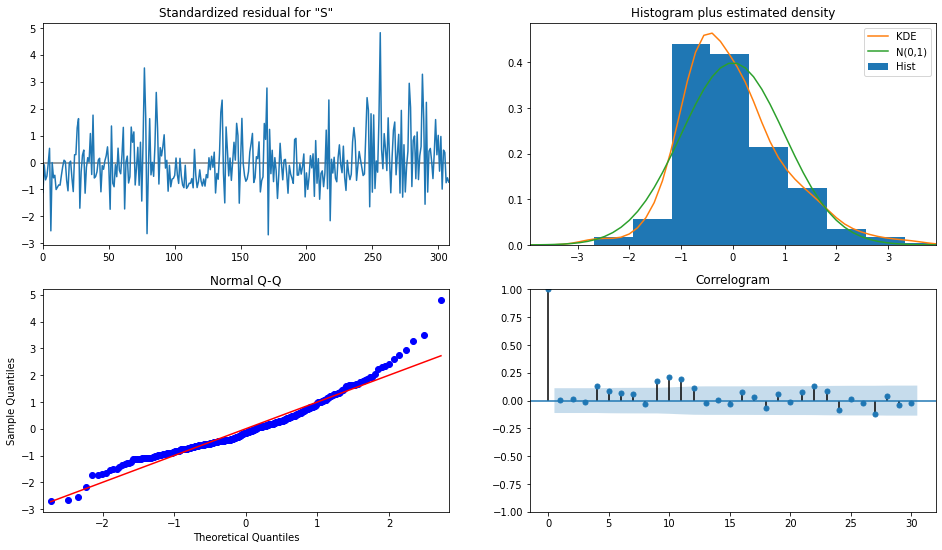

In [ ]:
fig = plt.figure(figsize=(16,9))
fig = ARMA_2_2.plot_diagnostics(fig=fig, lags=30)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score
import numpy
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

def make_forecast(series, model_fit, steps=1):
  # seasonal difference
  X = series.values
  days_in_year = 365
  differenced = difference(X, days_in_year)

  # fit model
  # model = ARIMA(differenced, order=(7,0,1))
  # model_fit = model.fit()

  # multi-step out-of-sample forecast
  forecast = model_fit.forecast(steps=steps)

  # invert the differenced forecast to something usable
  history = [x for x in X]
  day = 1
  for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_in_year)
    print('Day %d: %f' % (day, inverted))
    history.append(inverted)
    day += 1

  pd.DataFrame(history)[-steps::].plot()
  return history[-steps::]

Day 1: 225065.523640
Day 2: 224108.543847
Day 3: 223664.066724
Day 4: 222562.098302
Day 5: 223244.644535
Day 6: 222594.711310
Day 7: 222508.304438


-15956.89089677234

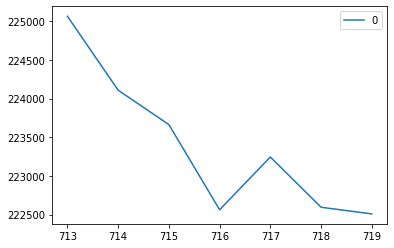

In [ ]:
y_pred = make_forecast(df.y[7::], AR_1, 7)
r2_score(y_pred, df.y[:7])


Day 1: 225266.294494
Day 2: 224263.033050
Day 3: 223812.333494
Day 4: 222697.960356
Day 5: 223369.362255
Day 6: 222708.342354
Day 7: 222611.096080


-15031.559087322297

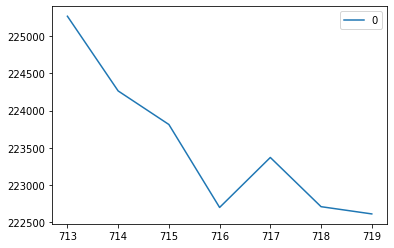

In [ ]:
y_pred = make_forecast(df.y[7::], AR_2, 7)
r2_score(y_pred, df.y[:7])

Day 1: 120304.530186
Day 2: 119316.915580
Day 3: 118839.553875
Day 4: 117703.171721
Day 5: 118350.303560
Day 6: 117664.342462
Day 7: 117541.577528


-60.623671435844365

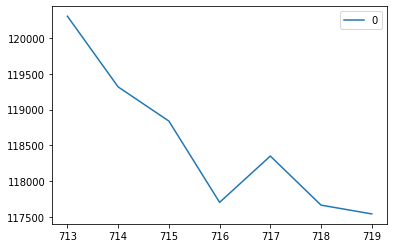

In [ ]:
y_pred = make_forecast(df.y[7::], ARMA_1_1, 7)
r2_score(y_pred, df.y[:7])

Day 1: 120309.555200
Day 2: 119329.972502
Day 3: 118863.739397
Day 4: 117735.139829
Day 5: 118383.519713
Day 6: 117692.304494
Day 7: 117560.088852


-61.92232524708061

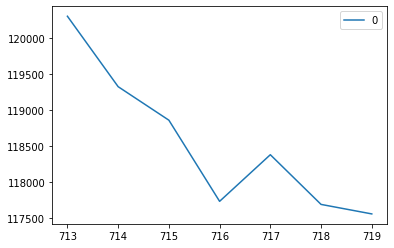

In [ ]:
y_pred = make_forecast(df.y[7::], ARMA_2_2, 7)
r2_score(y_pred, df.y[:7])

### FbProphet

In [88]:
dff = df[7::]
dff

,y,ds
7,112203.0,2022-09-05
8,110864.0,2022-09-02
9,110405.0,2022-09-01
10,109523.0,2022-08-31
11,110431.0,2022-08-30
...,...,...
715,107364.0,2019-10-25
716,106986.0,2019-10-24
717,107544.0,2019-10-23
718,107381.0,2019-10-22


#### BaseModel

In [11]:
from prophet import Prophet

model = Prophet()
model.fit(dff)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg2413l8/03bzqyis.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg2413l8/ktzsffzh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50227', 'data', 'file=/tmp/tmphg2413l8/03bzqyis.json', 'init=/tmp/tmphg2413l8/ktzsffzh.json', 'output', 'file=/tmp/tmpeyxrd0bt/prophet_model-20220915131645.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:16:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:16:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [12]:
future_dates = model.make_future_dataframe(periods=7)
prediction = model.predict(future_dates)

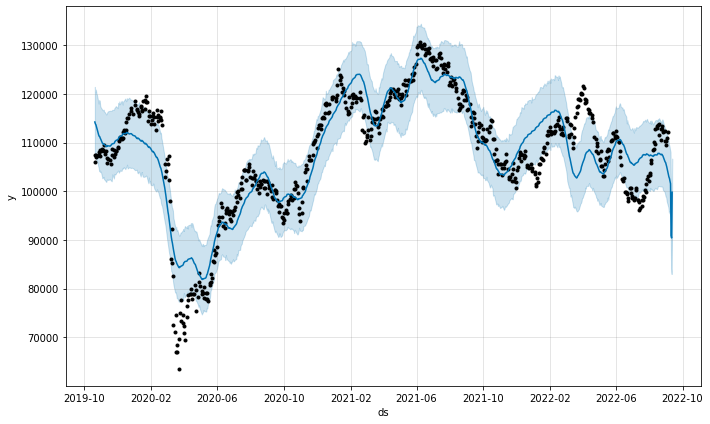

In [14]:
import matplotlib.pyplot as plt

model.plot(prediction)
plt.show()

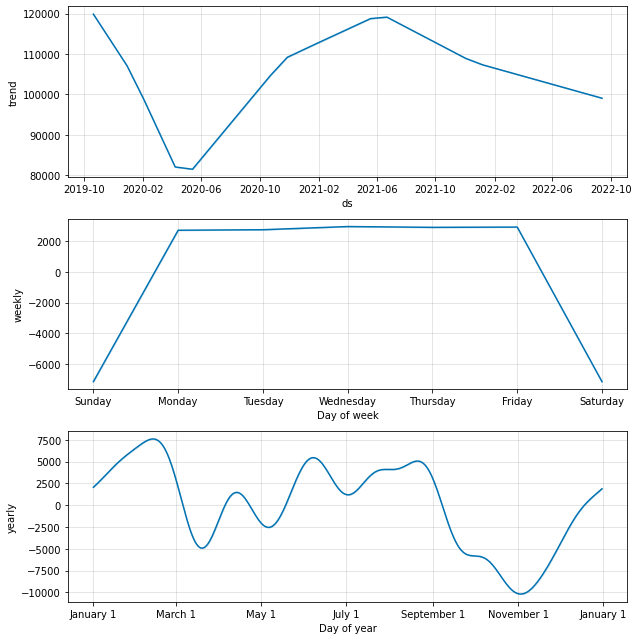

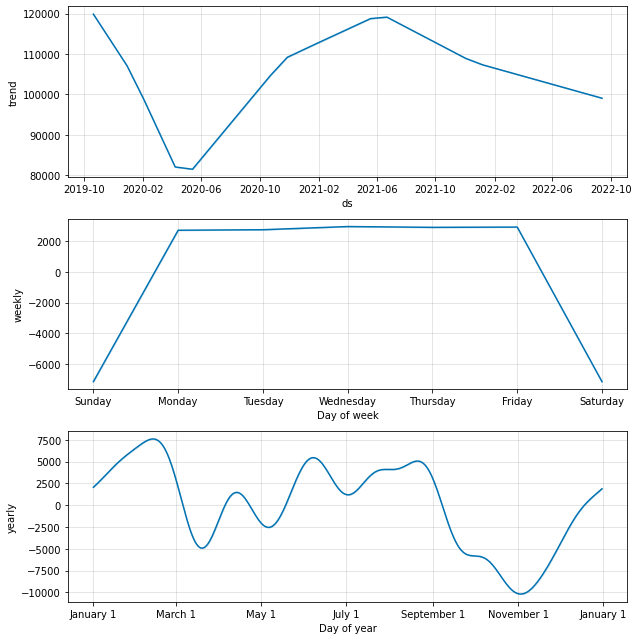

In [15]:
model.plot_components(prediction)

In [16]:
preds = prediction.iloc[-7::]
preds

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
713,2022-09-06,99277.774817,95630.656096,109677.594142,99277.774817,99277.774817,3699.908390,3699.908390,3699.908390,2767.586702,2767.586702,2767.586702,932.321688,932.321688,932.321688,0.0,0.0,0.0,102977.683206
714,2022-09-07,99244.478903,95932.432839,109368.988226,99244.478903,99244.478903,3418.846815,3418.846815,3418.846815,2974.828481,2974.828481,2974.828481,444.018334,444.018334,444.018334,0.0,0.0,0.0,102663.325718
715,2022-09-08,99211.182989,95211.479436,108644.441207,99211.182989,99211.182989,2872.349684,2872.349684,2872.349684,2923.086843,2923.086843,2923.086843,-50.737160,-50.737160,-50.737160,0.0,0.0,0.0,102083.532672
716,2022-09-09,99177.887075,94685.599997,108140.040544,99177.887075,99177.887075,2394.105557,2394.105557,2394.105557,2941.002177,2941.002177,2941.002177,-546.896620,-546.896620,-546.896620,0.0,0.0,0.0,101571.992632
717,2022-09-10,99144.591161,84214.995777,97839.304152,99144.591161,99144.591161,-8209.438812,-8209.438812,-8209.438812,-7170.017456,-7170.017456,-7170.017456,-1039.421356,-1039.421356,-1039.421356,0.0,0.0,0.0,90935.152348
718,2022-09-11,99111.295247,82995.878701,97638.233193,99111.295247,99111.295247,-8693.395970,-8693.395970,-8693.395970,-7170.010738,-7170.010738,-7170.010738,-1523.385232,-1523.385232,-1523.385232,0.0,0.0,0.0,90417.899277
719,2022-09-12,99077.999332,92881.555153,106740.665830,99077.999332,99077.999332,739.448933,739.448933,739.448933,2733.523991,2733.523991,2733.523991,-1994.075058,-1994.075058,-1994.075058,0.0,0.0,0.0,99817.448266


In [22]:
r2_score(df[:7].y, preds.yhat)

-118.49924249740441

#### Exponencial

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg2413l8/rod5_djm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg2413l8/lyn4_3xv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70311', 'data', 'file=/tmp/tmphg2413l8/rod5_djm.json', 'init=/tmp/tmphg2413l8/lyn4_3xv.json', 'output', 'file=/tmp/tmpxeqxipcs/prophet_model-20220915131922.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:19:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:19:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


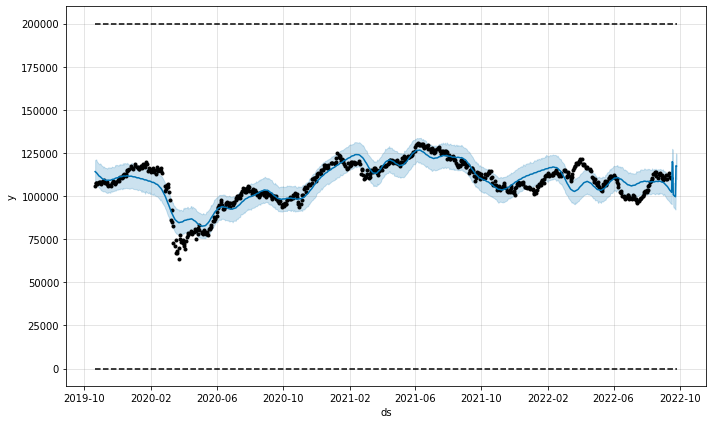

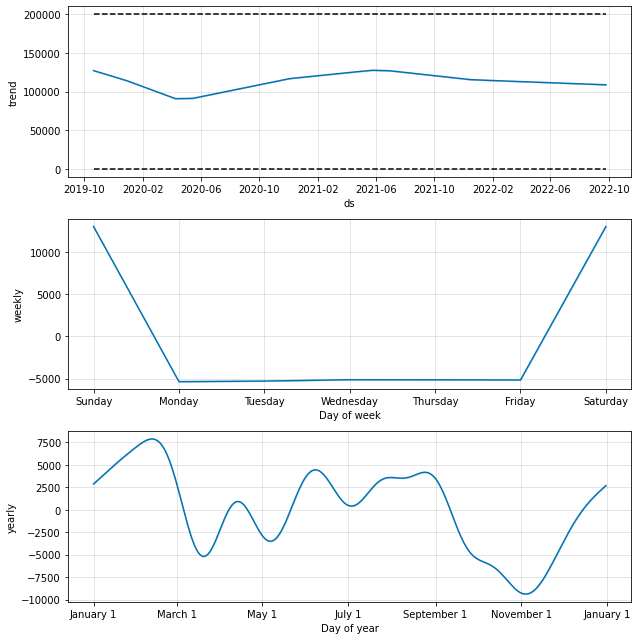

In [23]:
model = Prophet(
    growth='logistic', 
    changepoint_prior_scale=0.1, 
    seasonality_prior_scale=1.0
)

df['cap'] = 200000
df['floor'] = 0

model.fit(df)

future = model.make_future_dataframe(periods=10)
future['cap'] = 200000
future['floor'] = 0

forecast = model.predict(future)

fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

In [26]:
from prophet.diagnostics import cross_validation

df_cv = cross_validation(model, initial='700 days', period='100 days', horizon='180 days' , parallel='processes')

INFO:prophet:Making 2 forecasts with cutoffs between 2021-12-09 00:00:00 and 2022-03-19 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f640f080250>
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg2413l8/w7n5ixu3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg2413l8/f_nzhetr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg2413l8/72o6tzy_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg2413l8/wc1n_vxm.json
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93925', 'data', 'file=/tmp/tmphg2413l8/w7n5ixu3.json', 'init=/tmp/tmphg2413l8/72o6tzy_.json', 'output', 'file=/tmp/tmp_0aqywhh/prophet_model-20220915132028.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
13:20:28 - cmdstanpy - INFO - Chain [1] start proces

In [27]:
from prophet.diagnostics import performance_metrics

df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,18 days,2.579816e+08,16061.806186,13198.654004,0.112454,0.157057,0.121814,0.250000
1,19 days,2.594396e+08,16107.129744,13457.011882,0.114783,0.153946,0.124012,0.208333
2,20 days,2.491569e+08,15784.705499,13217.861375,0.113023,0.110523,0.121618,0.187500
3,21 days,2.426261e+08,15576.460731,13059.236014,0.111948,0.110523,0.120118,0.166667
4,23 days,2.412661e+08,15532.741603,13160.068153,0.112840,0.100139,0.120967,0.145833


#### GridSearching

In [24]:
import datetime
import itertools
import numpy as np
import pandas as pd

In [28]:
param_grid = {
    'changepoint_prior_scale' : [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0]
}

cutoffs = pd.to_datetime(['2022-01-01', '2021-01-01', '2020-01-01'])

# Generate all combinations of parameters

all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here
mapes = [] # Store the MAPEs for each params here
# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='30 days',  parallel="processes")
    df_p = performance_metrics(df_cv)
    rmses.append(df_p['rmse'].values[0])
    mapes.append(df_p['mape'].values[0])
# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
tuning_results['mape'] = mapes
print(tuning_results)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg2413l8/q0qc8en5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg2413l8/va2zu7ps.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28129', 'data', 'file=/tmp/tmphg2413l8/q0qc8en5.json', 'init=/tmp/tmphg2413l8/va2zu7ps.json', 'output', 'file=/tmp/tmpjzvav8xh/prophet_model-20220915132047.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:20:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:20:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f640efc2dd0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg2413l8/6f6

    changepoint_prior_scale  seasonality_prior_scale          rmse      mape
0                     0.001                     0.01  14724.845360  0.109458
1                     0.001                     0.10  17764.507603  0.133348
2                     0.001                     1.00  18103.304880  0.136301
3                     0.001                    10.00  19160.798921  0.145459
4                     0.010                     0.01   6502.132591  0.049967
5                     0.010                     0.10   6953.597993  0.055463
6                     0.010                     1.00   6995.666428  0.056685
7                     0.010                    10.00   7361.083869  0.060949
8                     0.100                     0.01   4212.030930  0.036084
9                     0.100                     0.10   3188.395121  0.025382
10                    0.100                     1.00   2732.874362  0.021441
11                    0.100                    10.00   2692.893044  0.022149

In [29]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 1.0}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg2413l8/4hrq3fy7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg2413l8/tr8rg0yb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45472', 'data', 'file=/tmp/tmphg2413l8/4hrq3fy7.json', 'init=/tmp/tmphg2413l8/tr8rg0yb.json', 'output', 'file=/tmp/tmp4632vn97/prophet_model-20220915132353.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:23:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:23:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


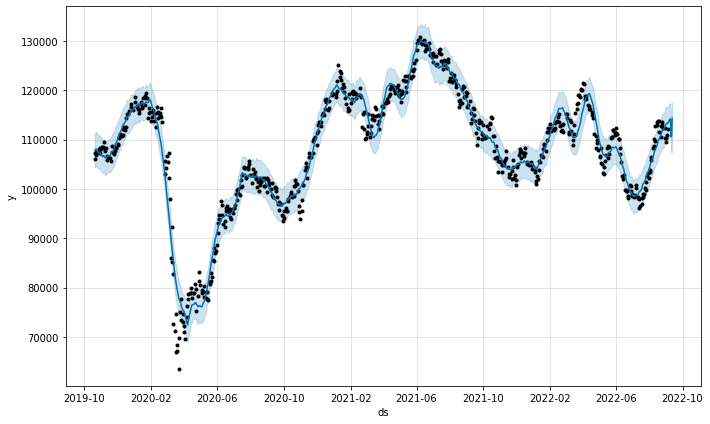

In [35]:
model = Prophet(**best_params)
model.fit(dff)

future = model.make_future_dataframe(periods=7)

forecast = model.predict(future)
fig1 = model.plot(forecast)

In [43]:
forecast[-7::]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
713,2022-09-06,127307.896614,110300.167751,117041.370199,127307.896614,127307.896614,-13567.420393,-13567.420393,-13567.420393,1008.273355,1008.273355,1008.273355,-14575.693747,-14575.693747,-14575.693747,0.0,0.0,0.0,113740.476222
714,2022-09-07,127482.851204,110545.209907,117357.974396,127482.851204,127482.851204,-13406.264122,-13406.264122,-13406.264122,1219.113886,1219.113886,1219.113886,-14625.378008,-14625.378008,-14625.378008,0.0,0.0,0.0,114076.587083
715,2022-09-08,127657.805794,110846.321399,117338.884047,127657.805794,127657.805794,-13472.594964,-13472.594964,-13472.594964,1205.213307,1205.213307,1205.213307,-14677.808271,-14677.808271,-14677.808271,0.0,0.0,0.0,114185.210830
716,2022-09-09,127832.760384,110642.231392,117373.184476,127832.760384,127832.760384,-13720.875264,-13720.875264,-13720.875264,1010.671398,1010.671398,1010.671398,-14731.546662,-14731.546662,-14731.546662,0.0,0.0,0.0,114111.885119
717,2022-09-10,128007.714973,107560.316883,113677.840947,128007.714973,128007.714973,-17444.007177,-17444.007177,-17444.007177,-2658.936426,-2658.936426,-2658.936426,-14785.070751,-14785.070751,-14785.070751,0.0,0.0,0.0,110563.707796
718,2022-09-11,128182.669563,107362.014095,114020.118930,128182.669563,128182.669563,-17495.728322,-17495.728322,-17495.728322,-2658.938032,-2658.938032,-2658.938032,-14836.790290,-14836.790290,-14836.790290,0.0,0.0,0.0,110686.941241
719,2022-09-12,128357.624153,111028.384993,117707.557762,128357.624153,128357.624153,-14010.463505,-14010.463505,-14010.463505,874.602511,874.602511,874.602511,-14885.066017,-14885.066017,-14885.066017,0.0,0.0,0.0,114347.160648


In [45]:
r2_score(df.y[:7], forecast[-7::].yhat)

-4.5768704970196605

### RNN 

In [48]:
from keras.layers import Dense, LSTM
from keras.models import Sequential
from tensorflow.keras import layers

In [49]:
#função muito útil! não lembro aonde encontrei. fica ai o crédito ao possível autor
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [89]:
n_features = 1
n_steps = 15

df = dff
X, y = split_sequence(list(df['y']), n_steps)

In [90]:
X.shape

(698, 15)

In [91]:
X = X.reshape((X.shape[0], X.shape[1], n_features))

x_test = X[1:100, :, :]
x_train = X[101:X.shape[0], :]

y_test = y[1:100]
y_train = y[101:X.shape[0]]

In [92]:

model = Sequential([
    layers.SimpleRNN(50, activation='relu', input_shape=(n_steps, n_features)),
    Dense(1),
])
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [93]:
model.fit(x_test, y_test, epochs=500, verbose=1)

Epoch 1/500
4/4 [==============================] - 1s 5ms/step - loss: 6154345472.0000
Epoch 2/500
4/4 [==============================] - 0s 6ms/step - loss: 4227518720.0000
Epoch 3/500
4/4 [==============================] - 0s 4ms/step - loss: 2299394816.0000
Epoch 4/500
4/4 [==============================] - 0s 5ms/step - loss: 896855040.0000
Epoch 5/500
4/4 [==============================] - 0s 5ms/step - loss: 116352912.0000
Epoch 6/500
4/4 [==============================] - 0s 9ms/step - loss: 137418832.0000
Epoch 7/500
4/4 [==============================] - 0s 6ms/step - loss: 294493440.0000
Epoch 8/500
4/4 [==============================] - 0s 5ms/step - loss: 101361144.0000
Epoch 9/500
4/4 [==============================] - 0s 5ms/step - loss: 7125555.0000
Epoch 10/500
4/4 [==============================] - 0s 5ms/step - loss: 41793680.0000
Epoch 11/500
4/4 [==============================] - 0s 5ms/step - loss: 57099720.0000
Epoch 12/500
4/4 [==============================] - 0

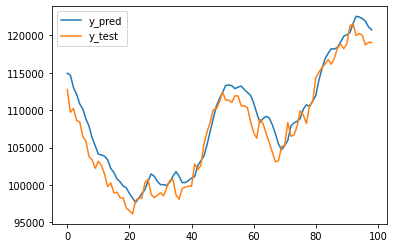

In [122]:
y_pred = model.predict(x_test)

plt.plot(y_pred, label='y_pred')
plt.plot(y_test, label='y_test')
plt.legend()

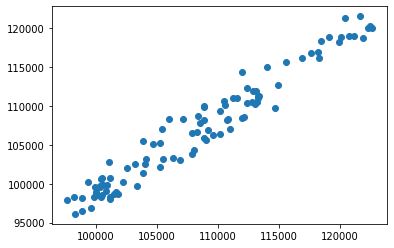

In [123]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, y_test)

In [124]:
# df = df[1::]

preds = model.predict(df.y[:7])
r2_score(df.y[:7], preds)

-2989.577473477571

#### DeepRNN

In [125]:
n_features = 1

model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)),
    LSTM(50, activation='relu', return_sequences=True),
    LSTM(50, activation='relu', return_sequences=True),
    LSTM(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 15, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 15, 50)            20200     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [126]:
model.fit(x_train, y_train, epochs=500, verbose=1)

Epoch 1/500
19/19 [==============================] - 5s 28ms/step - loss: 10157648896.0000
Epoch 2/500
19/19 [==============================] - 1s 29ms/step - loss: 6471406080.0000
Epoch 3/500
19/19 [==============================] - 1s 29ms/step - loss: 5012816896.0000
Epoch 4/500
19/19 [==============================] - 1s 28ms/step - loss: 2677927168.0000
Epoch 5/500
19/19 [==============================] - 1s 28ms/step - loss: 2460548352.0000
Epoch 6/500
19/19 [==============================] - 1s 29ms/step - loss: 3413172736.0000
Epoch 7/500
19/19 [==============================] - 1s 29ms/step - loss: 355749952.0000
Epoch 8/500
19/19 [==============================] - 1s 29ms/step - loss: 773162688.0000
Epoch 9/500
19/19 [==============================] - 1s 28ms/step - loss: 173007200.0000
Epoch 10/500
19/19 [==============================] - 1s 28ms/step - loss: 98779120.0000
Epoch 11/500
19/19 [==============================] - 1s 29ms/step - loss: 64658160.0000
Epoch 12/500
1

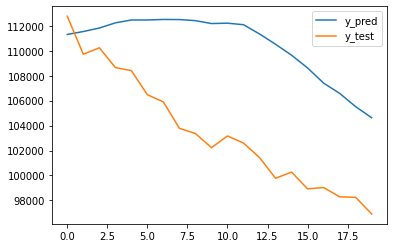

In [127]:
r2y_pred = model.predict(x_test)

plt.plot(y_pred[:20], label='y_pred')
plt.plot(y_test[:20], label='y_test')
plt.legend()

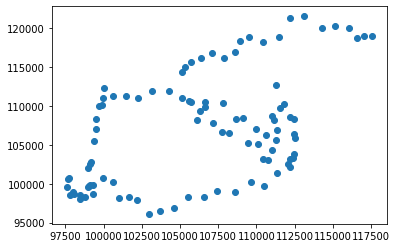

In [129]:
plt.scatter(y_pred, y_test)

In [130]:
preds = model.predict(df.y[:7])
r2_score(df.y[:7], preds)

-7637.541928906493

## Final Model & Next Day Prediction

The metrics i used to validate the models is r2_score.

For this propouse, i'm using the FBProphet model witch was the best accuracy with the metrics i choose.



In [132]:
df

,y,ds
1,110547.0,2022-09-14
2,110794.0,2022-09-13
3,113407.0,2022-09-12
4,112300.0,2022-09-09
5,109916.0,2022-09-08
...,...,...
715,107364.0,2019-10-25
716,106986.0,2019-10-24
717,107544.0,2019-10-23
718,107381.0,2019-10-22


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg2413l8/ugpbosds.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphg2413l8/isqqr_v6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17537', 'data', 'file=/tmp/tmphg2413l8/ugpbosds.json', 'init=/tmp/tmphg2413l8/isqqr_v6.json', 'output', 'file=/tmp/tmp5x6qvdia/prophet_model-20220915134944.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:49:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:49:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


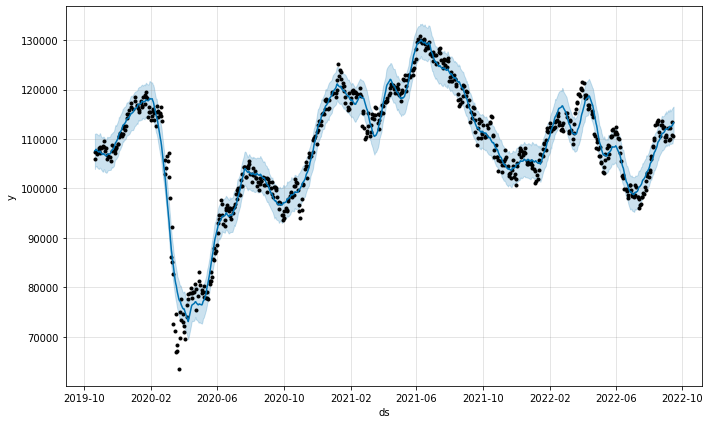

In [139]:
# load prophet with the best params after grid search
best_params = {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 1.0}

final_model = Prophet(**best_params)
final_model.fit(df)

future = final_model.make_future_dataframe(periods=1)

forecast = final_model.predict(future)
fig1 = final_model.plot(forecast)

In [149]:
print(f'The estimate closing price for the next day is {forecast[-1::].yhat.values[0].round(2)}')

The estimate closing price for the next day is 113272.3
